단순회귀분석

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./auto-mpg.csv',header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
pd.set_option('display.max_columns',10)
print(df)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0      130.0  3504.0          12.0   
1    15.0          8         350.0      165.0  3693.0          11.5   
2    18.0          8         318.0      150.0  3436.0          11.0   
3    16.0          8         304.0      150.0  3433.0          12.0   
4    17.0          8         302.0      140.0  3449.0          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0      86.00  2790.0          15.6   
394  44.0          4          97.0      52.00  2130.0          24.6   
395  32.0          4         135.0      84.00  2295.0          11.6   
396  28.0          4         120.0      79.00  2625.0          18.6   
397  31.0          4         119.0      82.00  2720.0          19.4   

     model year  origin                       name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick sk

In [ ]:
#데이터 탐색
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None
              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000   

In [ ]:
#전처리
print(df.horsepower.unique())
df.horsepower.replace('?',np.nan,inplace=True)
df.dropna(subset=['horsepower'],axis=0,inplace=True)
df.horsepower = df.horsepower.astype('float')

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


In [ ]:
#feature 선택
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())   

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


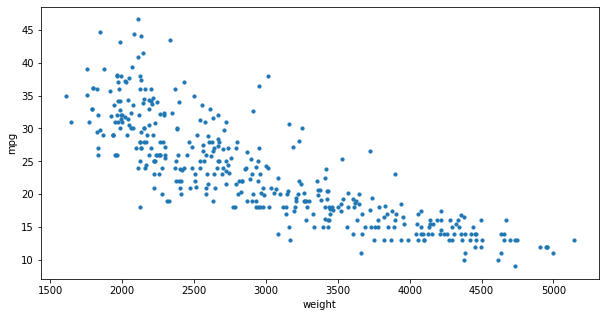

In [ ]:
ndf.plot(kind='scatter',x='weight',y='mpg', s=10,figsize=(10,5))
plt.show()
plt.close()

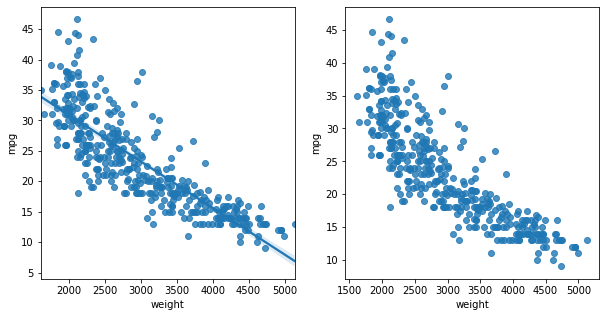

In [ ]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='weight',y='mpg',data=ndf,ax=ax1)
sns.regplot(x='weight',y='mpg',data=ndf,ax=ax2,fit_reg=False)
plt.show()
plt.close()

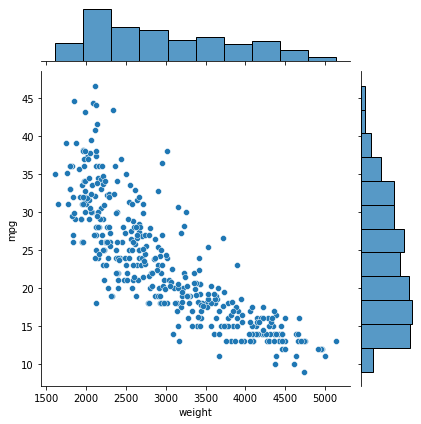

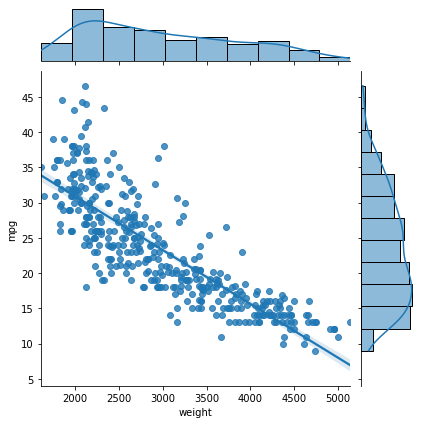

In [ ]:
sns.jointplot(x='weight',y='mpg',data=ndf)
sns.jointplot(x='weight',y='mpg',kind='reg',data=ndf)
plt.show()
plt.close()

In [ ]:
grid_ndf = sns.pairplot(ndf)

plt.close()

In [ ]:
X=ndf[['weight']]
Y=ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=10)

print('train data: ',len(X_train))
print('test data: ',len(X_test))

train data:  274
test data:  118


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

r_squared = lr.score(X_test,Y_test)
print(r_squared)

0.6822458558299322


In [ ]:
print('slope: ',lr.coef_)
print('bias: ',lr.intercept_)

slope:  [-0.00775343]
bias:  46.7103662572801


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


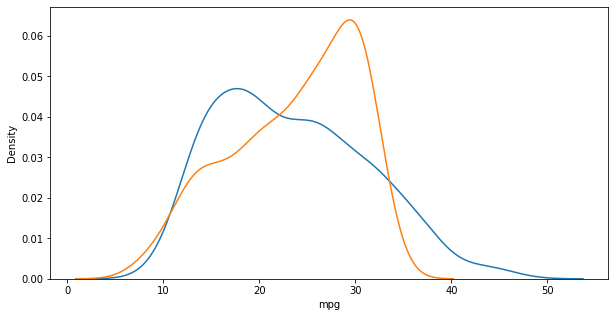

In [ ]:
y_hat = lr.predict(X)

plt.figure(figsize=(10,5))
ax1=sns.distplot(Y,hist=False,label='Y')
ax2=sns.distplot(y_hat,hist=False,label='y_hat',ax=ax1)
plt.show()
plt.close()

다항회귀분석

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)#2차항 적용
X_train_poly=poly.fit_transform(X_train)

print('polynominal data: ',X_train_poly.shape)

polynominal data:  (274, 3)


In [ ]:
pr = LinearRegression()
pr.fit(X_train_poly,Y_train)

X_test_poly = poly.fit_transform(X_test)
r_squared = pr.score(X_test_poly,Y_test)
print(r_squared)

0.7087009262975479


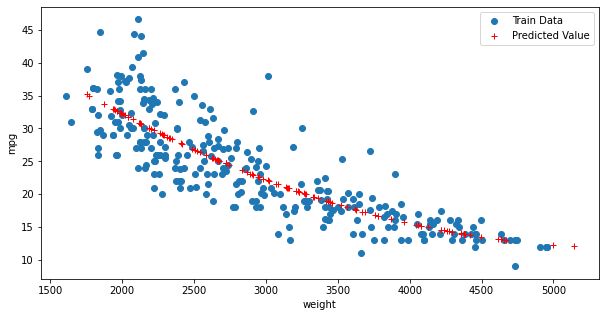

In [ ]:
Y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, Y_train, 'o',label='Train Data')
ax.plot(X_test, Y_hat_test, 'r+',label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

다중회귀분석

In [ ]:
X=ndf[['cylinders','horsepower','weight']]
Y=ndf['mpg']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)
print('train set shape: ',X_train.shape)

train set shape:  (274, 3)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,Y_train)
r_squared = lr.score(X_test,Y_test)
print(r_squared)

print('slope: ',lr.coef_)
print('intercept: ',lr.intercept_)

0.6939048496695599
slope:  [-0.60691288 -0.03714088 -0.00522268]
intercept:  46.414351269634025


분류

KNN

In [ ]:
df = sns.load_dataset('titanic')
print(df.info())

rdf = df.drop(['deck','embark_town'], axis =1)
print(rdf.columns.values)

rdf = rdf.dropna(subset=['age'],how='any',axis=0)#age에서 nan뜬 행 삭제
print(len(rdf))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
None
['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'

In [ ]:
most_freq = rdf.embarked.value_counts(dropna=True).idxmax()
print(most_freq)
rdf.embarked.fillna(most_freq, inplace=True)

S


In [ ]:
ndf = rdf[['survived','pclass','sex','age','sibsp','parch','embarked']]
print(ndf.head())

   survived  pclass     sex   age  sibsp  parch embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S


In [ ]:
onehot_sex = pd.get_dummies(ndf.sex)
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf.embarked,prefix='town')#마을이름 앞에 town
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex','embarked'],axis=1,inplace=True)
print(ndf.head())

   survived  pclass   age  sibsp  parch  female  male  town_C  town_Q  town_S
0         0       3  22.0      1      0       0     1       0       0       1
1         1       1  38.0      1      0       1     0       1       0       0
2         1       3  26.0      0      0       1     0       0       0       1
3         1       1  35.0      1      0       1     0       0       0       1
4         0       3  35.0      0      0       0     1       0       0       1


In [ ]:
X = ndf[['pclass','age','sibsp','parch','female','male','town_C','town_Q','town_S']]
Y = ndf['survived']

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)#normalize

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state = 10)
print(X_train.shape, X_test.shape)

(499, 9) (215, 9)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_hat = knn.predict(X_test)

print(Y_hat[0:10])
print(Y_test.values[0:10])

[0 0 1 0 0 1 1 1 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [ ]:
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(Y_test,Y_hat)
print(knn_matrix)

[[109  16]
 [ 25  65]]


In [ ]:
knn_report = metrics.classification_report(Y_test,Y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       125
           1       0.80      0.72      0.76        90

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



SVM

In [ ]:
from sklearn import svm

svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train,Y_train)

Y_hat = svm_model.predict(X_test)
print(Y_hat[0:10])
print(Y_test.values[0:10])

[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [ ]:
svm_matrix = metrics.confusion_matrix(Y_test,Y_hat)
print(svm_matrix)
svm_report = metrics.classification_report(Y_test,Y_hat)
print(svm_report)

[[120   5]
 [ 35  55]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



Decision Tree

In [ ]:
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)

df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
              'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class']

print(df.head())
print(df.info())
print(df.describe())

        id  clump  cell_size  cell_shape  adhesion  ...  bare_nuclei  \
0  1000025      5          1           1         1  ...            1   
1  1002945      5          4           4         5  ...           10   
2  1015425      3          1           1         1  ...            2   
3  1016277      6          8           8         1  ...            4   
4  1017023      4          1           1         3  ...            1   

  chromatin  normal_nucleoli  mitoses  class  
0         3                1        1      2  
1         3                2        1      2  
2         3                1        1      2  
3         3                7        1      2  
4         3                1        1      2  

[5 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump            

In [ ]:
print(df.bare_nuclei.unique())
df.bare_nuclei.replace('?',np.nan,inplace=True)
df.dropna(subset=['bare_nuclei'],axis=0,inplace=True)
df.bare_nuclei = df.bare_nuclei.astype('int')

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [ ]:
X = df[['clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses']] 
Y = df['class'] 
X = preprocessing.StandardScaler().fit(X).transform(X)

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=10)
print(X_train.shape, X_test.shape)

(478, 9) (205, 9)


In [ ]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
tree_model.fit(X_train,Y_train)

Y_hat = tree_model.predict(X_test)
print(Y_hat[0:10])
print(Y_test.values[0:10])

[4 4 4 4 4 4 2 2 4 4]
[4 4 4 4 4 4 2 2 4 4]


In [ ]:
tree_matrix = metrics.confusion_matrix(Y_test,Y_hat)
print(tree_matrix)
tree_report = metrics.classification_report(Y_test,Y_hat)
print(tree_report)

[[127   4]
 [  2  72]]
              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



군집

K-Means

In [ ]:
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)

print(df.head())
print(df.info())
print(df.describe())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

In [ ]:
X = df.iloc[:,:]
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [ ]:
from sklearn import cluster

kmeans = cluster.KMeans(init='k-means++',n_clusters=5,n_init=10)
kmeans.fit(X)

cluster_label = kmeans.labels_
print(len(cluster_label))

df['Cluster'] = cluster_label
print(df.head())

440
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        1  
1        1776        1  
2        7844        1  
3        1788        0  
4        5185        1  


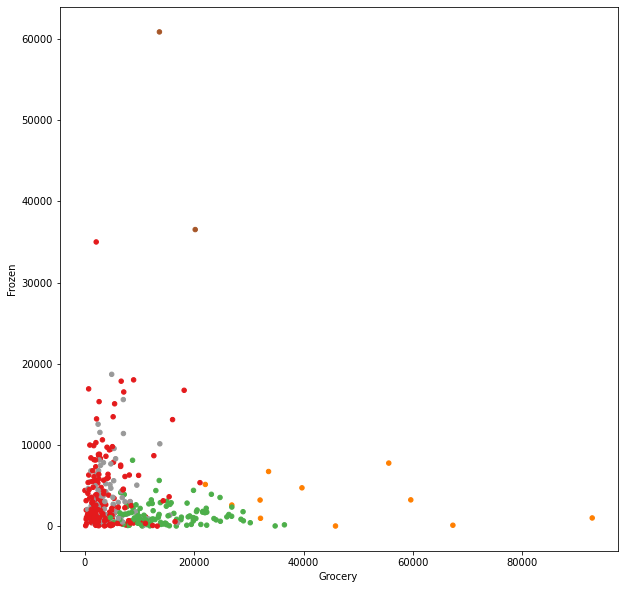

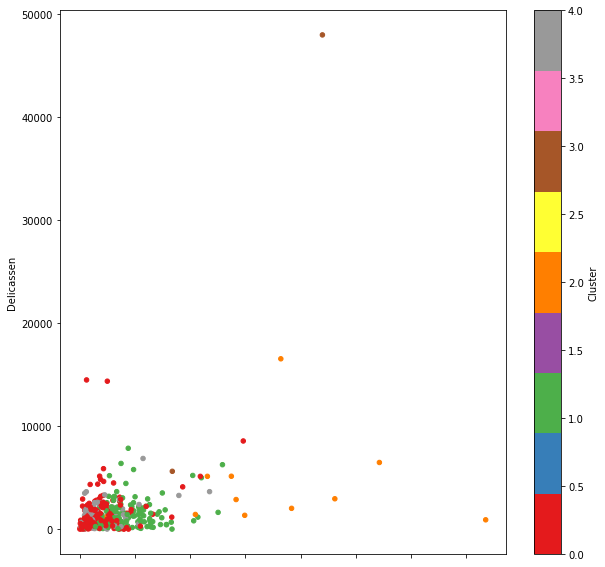

In [ ]:
df.plot(kind='scatter',x='Grocery',y='Frozen',c='Cluster',cmap='Set1',colorbar=False,figsize=(10,10))
df.plot(kind='scatter',x='Milk',y='Delicassen',c='Cluster',cmap='Set1',colorbar=True,figsize=(10,10))
plt.show()
plt.close()

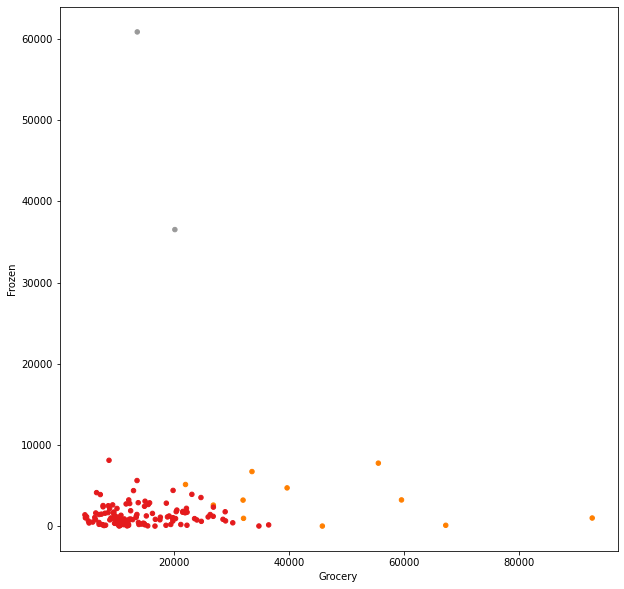

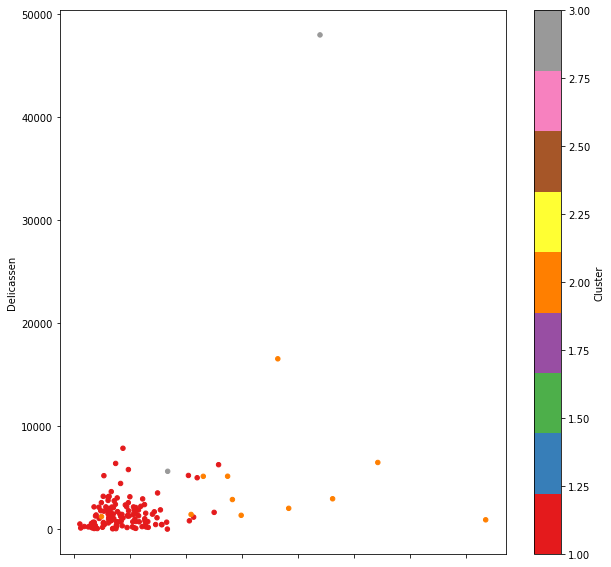

In [ ]:
mask = (df.Cluster == 0) | (df.Cluster == 4)
ndf = df[~mask]

ndf.plot(kind='scatter',x='Grocery',y='Frozen',c='Cluster',cmap='Set1',colorbar=False,figsize=(10,10))
ndf.plot(kind='scatter',x='Milk',y='Delicassen',c='Cluster',cmap='Set1',colorbar=True,figsize=(10,10))
plt.show()
plt.close()